In [ ]:
#Your project should include 

    #sorting, indexing, and grouping (10)
    #Slicing, loc or iloc (10)
    #Looping, iterrows (10)
    #Merge DataFrames (10)
    
    #Define a custom function to create reusable code (10)
    #NumPy (10)
    #Dictionary or Lists (10)


# 4. geographical analyzes and plotting
# 5. physical analyzes and plotting
# 6. social influences analyzes and plotting

In [ ]:
# 1. Data importation, cleaning and merging

In [13]:
import pandas as pd

filename='C:/Users/mschm/OneDrive/Bureau/UCD/Project_other_files/who_suicide_statistics.csv.zip'
WHO=pd.read_csv(filename)
WHO_ind=WHO.set_index('country')
WHO_ind.head()

,year,sex,age,suicides_no,population
country,,,,,
Albania,1985,female,15-24 years,NaN,277900.0
Albania,1985,female,25-34 years,NaN,246800.0
Albania,1985,female,35-54 years,NaN,267500.0
Albania,1985,female,5-14 years,NaN,298300.0
Albania,1985,female,55-74 years,NaN,138700.0


In [14]:
WHO_ind.shape

(43776, 5)

In [15]:
WHO_ind.isna().sum()

year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

In [16]:
WHO_ind_clean=WHO_ind.dropna()
WHO_ind_clean.shape

(36060, 5)

In [28]:
WHO_ind_clean.loc[:,'suicide_rate']=WHO_ind_clean.loc[:,'suicides_no']/WHO_ind_clean.loc[:,'population']*1000000
print(WHO_ind_clean.head())

         year     sex          age  suicides_no  population  suicide_rate
country                                                                  
Albania  1987  female  15-24 years         14.0    289700.0     48.325854
Albania  1987  female  25-34 years          4.0    257200.0     15.552100
Albania  1987  female  35-54 years          6.0    278800.0     21.520803
Albania  1987  female   5-14 years          0.0    311000.0      0.000000
Albania  1987  female  55-74 years          0.0    144600.0      0.000000


C:\Users\mschm\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [29]:
filename_bis='C:/Users/mschm/OneDrive/Bureau/UCD/Project_other_files/countries.csv.'
continents=pd.read_csv(filename_bis)
continents_ind=continents.set_index('Country')
print(continents_ind.head())

              Region  Population
Country                         
Angola        AFRICA    12127071
Benin         AFRICA     7862944
Botswana      AFRICA     1639833
Burkina Faso  AFRICA    13902972
Burundi       AFRICA     8090068


In [46]:
WHO_complete=WHO_ind_clean.merge(continents_ind['Region'],left_index=True,right_index=True,how='left')
print(WHO_complete.head())

         year     sex          age  suicides_no  population  suicide_rate  \
Albania  1987  female  15-24 years         14.0    289700.0     48.325854   
Albania  1987  female  25-34 years          4.0    257200.0     15.552100   
Albania  1987  female  35-54 years          6.0    278800.0     21.520803   
Albania  1987  female   5-14 years          0.0    311000.0      0.000000   
Albania  1987  female  55-74 years          0.0    144600.0      0.000000   

         Region  
Albania  EUROPE  
Albania  EUROPE  
Albania  EUROPE  
Albania  EUROPE  
Albania  EUROPE  


In [55]:
WHO_complete.shape

(36060, 7)

In [48]:
WHO_complete.isna().sum()

year               0
sex                0
age                0
suicides_no        0
population         0
suicide_rate       0
Region          4992
dtype: int64

In [80]:
WHO_complete_no_index=WHO_complete.reset_index()
print (WHO_complete_no_index)

                      index  year     sex          age  suicides_no  \
0                   Albania  1987  female  15-24 years         14.0   
1                   Albania  1987  female  25-34 years          4.0   
2                   Albania  1987  female  35-54 years          6.0   
3                   Albania  1987  female   5-14 years          0.0   
4                   Albania  1987  female  55-74 years          0.0   
...                     ...   ...     ...          ...          ...   
36055  Virgin Islands (USA)  2015    male  25-34 years          2.0   
36056  Virgin Islands (USA)  2015    male  35-54 years          1.0   
36057  Virgin Islands (USA)  2015    male   5-14 years          0.0   
36058  Virgin Islands (USA)  2015    male  55-74 years          0.0   
36059  Virgin Islands (USA)  2015    male    75+ years          0.0   

       population  suicide_rate  Region  
0        289700.0     48.325854  EUROPE  
1        257200.0     15.552100  EUROPE  
2        278800.0    

In [39]:
WHO_by_year_sum=WHO_complete.groupby(['year','Region']).sum()
print(WHO_by_year.head())

                       suicides_no    population  suicide_rate
year Region                                                   
1979 ASIA               666.777778  4.156219e+06    203.612855
     EUROPE             230.141667  1.666598e+06    172.940295
     LATIN               42.202381  1.216716e+06     71.562947
     NEAR_EAST           10.541667  1.822875e+05     51.324055
     NORTHERN_AMERICA   279.583333  1.825667e+06    148.180665


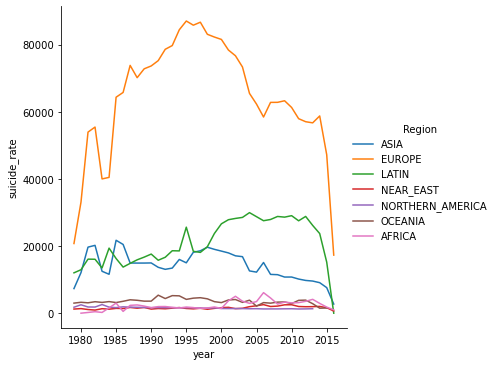

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(x="year",y="suicide_rate", data=WHO_by_year_sum, hue='Region', kind='line')
plt.show()

In [41]:
WHO_by_year_mean=WHO_complete.groupby(['year','Region']).mean()
print(WHO_by_year.head())

                       suicides_no    population  suicide_rate
year Region                                                   
1979 ASIA               666.777778  4.156219e+06    203.612855
     EUROPE             230.141667  1.666598e+06    172.940295
     LATIN               42.202381  1.216716e+06     71.562947
     NEAR_EAST           10.541667  1.822875e+05     51.324055
     NORTHERN_AMERICA   279.583333  1.825667e+06    148.180665


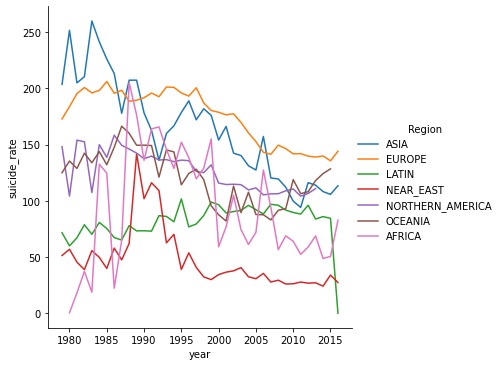

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(x="year",y="suicide_rate", data=WHO_by_year_mean, hue='Region', kind='line')
plt.show()